In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy
from scipy.optimize import leastsq , curve_fit
from scipy.signal import find_peaks


In [4]:
from lmfit.models import ExponentialModel, GaussianModel

In [186]:
from heapq import nsmallest

In [202]:
import lumispy

In [ ]:
from pyphotonics.photoluminescence import Photoluminescence

In [ ]:
#pl-data

In [11]:
pl= pd.read_excel(r'C:\Users\Asus\Desktop\solar_cell\Paper 1\pl.xlsx')

In [12]:
pl.dropna(axis=1, how='all',inplace=True)

In [13]:
pl.dropna(axis=0, how='any',inplace=True)

In [14]:
pl=pl.copy().rename(columns={'Unnamed: 0': 'wavelength'})

In [15]:
pl

,wavelength,Sample #1,Sample #2,Sample #3,Sample #4,Sample #5
0,351.0,8.362423,8.322040,5.846693,4.614909,9.212210
1,351.5,8.367572,8.322989,5.878439,4.651046,9.213130
2,352.0,8.357429,8.328711,5.880992,4.667770,9.182086
3,352.5,8.319901,8.334703,5.875514,4.699085,9.158171
4,353.0,8.285076,8.350400,5.862088,4.751971,9.134147
...,...,...,...,...,...,...
533,617.5,6.476886,6.660176,5.873828,2.764193,8.550463
534,618.0,6.431819,6.648390,5.863926,2.756905,8.530504
535,618.5,6.391367,6.639472,5.850224,2.746599,8.523877
536,619.0,6.366954,6.637024,5.828432,2.739335,8.525598


In [16]:
#excitation wavelenght = 325nm 

In [17]:
#x
x=(((pl.iloc[:,0:1]).to_numpy()).flatten())

In [18]:
#sample1
y1=(((pl.iloc[:,1:2]).to_numpy()).flatten())
#sample2
y2=(((pl.iloc[:,2:3]).to_numpy()).flatten())
#sample3
y3=(((pl.iloc[:,3:4]).to_numpy()).flatten())
#sample4
y4=(((pl.iloc[:,4:5]).to_numpy()).flatten())
#sample5
y5=(((pl.iloc[:,5:6]).to_numpy()).flatten())

# fwhm

In [19]:
#draft


#find peak properties (peak position, amplitude, full width half maximum ) to use as initial guesses for 
#          the curve_fit function. 
pk1, properties1 = find_peaks(y1 , height=.05, width = 3 ) 
#pk returns peaks position  
# properties returns other properties associated with the peaks

I1 = properties1 ['peak_heights'] #amplitude
fwhm1 = (properties1['widths']) #full width half maximum 

fwhm1,I1

In [20]:
def lorentzian( x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2 )

def multi_lorentz( x, params ):
    off = params[0]
    paramsRest = params[1:]
    assert not ( len( paramsRest ) % 3 )
    return off + sum( [ lorentzian( x, *paramsRest[ i : i+3 ] ) for i in range( 0, len( paramsRest ), 3 ) ] )

def res_multi_lorentz( params, xData, yData ):
    diff = [ multi_lorentz( x, params ) - y for x, y in zip( xData, yData ) ]
    return diff

In [24]:
def fit (x,y):
    y0 =y
    yData =y
    xData =x

    yGround = min( yData ) 
    yData = yData - yGround
    yAmp = max( yData )
    yData = yData / yAmp 

    #initial properties of peaks 
    pk, properties = find_peaks( yData, height = .05, width = 3 )
    #extract peak heights and fwhm 

    I = properties [ 'peak_heights' ]
    fwhm = properties[ 'widths' ]


    guess = [0]

    for i in range( len( pk ) ): 
        guess.append( pk[i] )
        guess.append( I[i] )
        guess.append( fwhm[i] ) 
        
    guess=np.array( guess )


    

    popt, pcov = leastsq( res_multi_lorentz , x0=guess, args=( xData, yData ) )
#x0=Initial guess on independent variables 
# print( popt )


    testData = [ multi_lorentz( x, popt ) for x in xData ]
    fitData = [ yGround + yAmp * multi_lorentz( x, popt ) for x in xData ]
    
    #plot

    fig= plt.figure( figsize=( 20, 10 ) )

    ax= fig.add_subplot( 2, 1, 1 )
    ax.plot( pk, yData[pk], 'o', ms=5 )
    ax.plot( xData, yData, 'ok', ms=1 )
    ax.plot( xData, testData , 'r--', lw=1.5 )

    bx= fig.add_subplot( 2, 1, 2 )

    bx.plot( xData, y0, ls='', marker='o', markersize=2 )
    bx.plot( xData, fitData )


    plt.show()

In [26]:
#sample1

c:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 3400.
  warnings.warn(errors[info][0], RuntimeWarning)


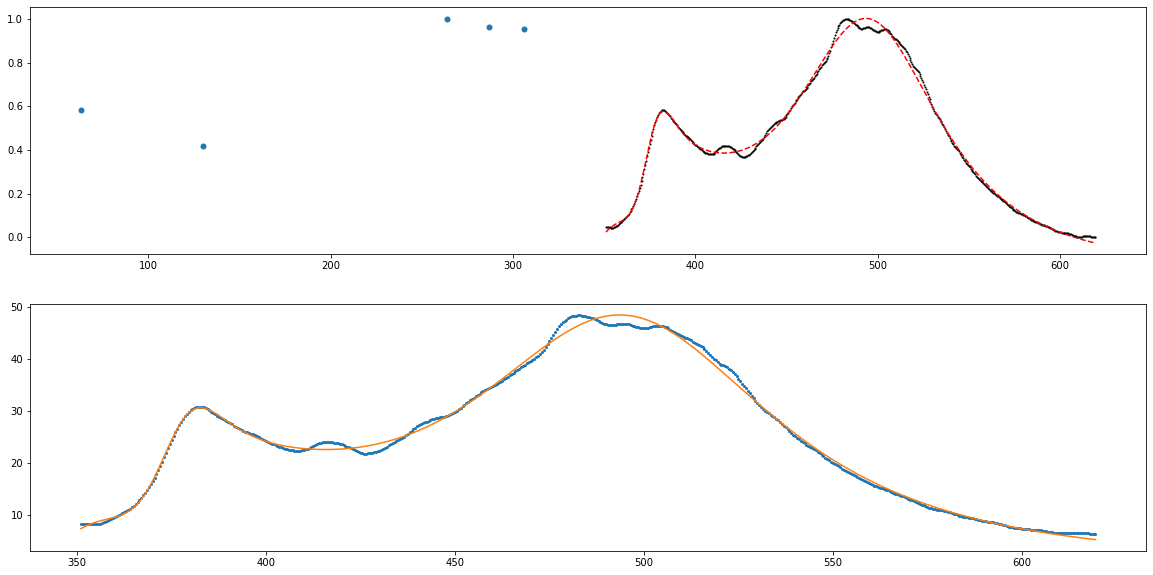

In [25]:
fit(x,y1)

# sample2

c:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 2200.
  warnings.warn(errors[info][0], RuntimeWarning)


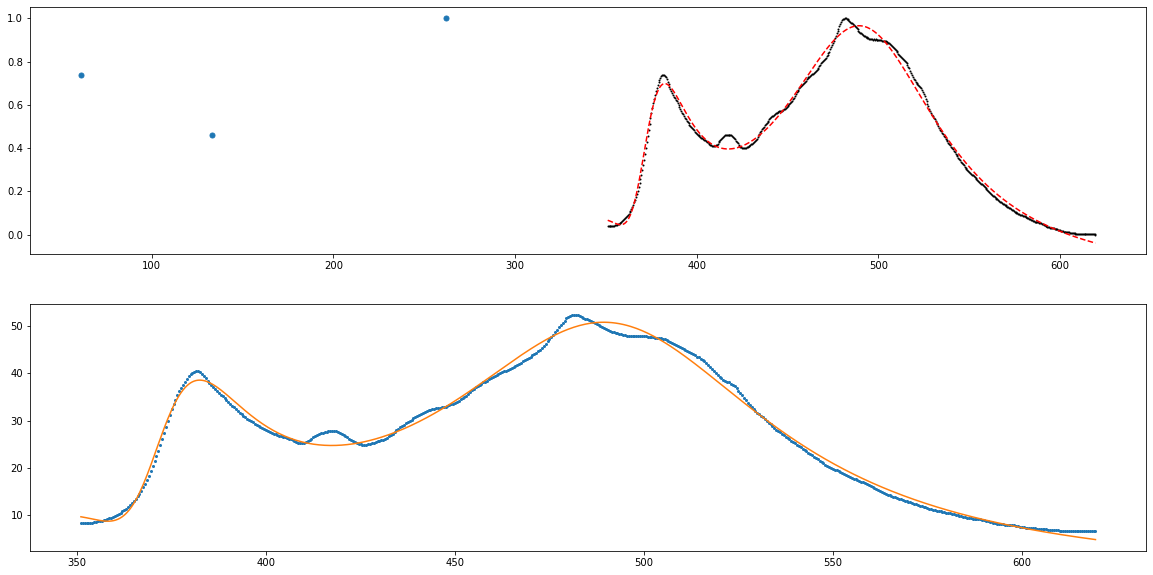

In [27]:
fit(x,y2)

# sampl3

c:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 2200.
  warnings.warn(errors[info][0], RuntimeWarning)


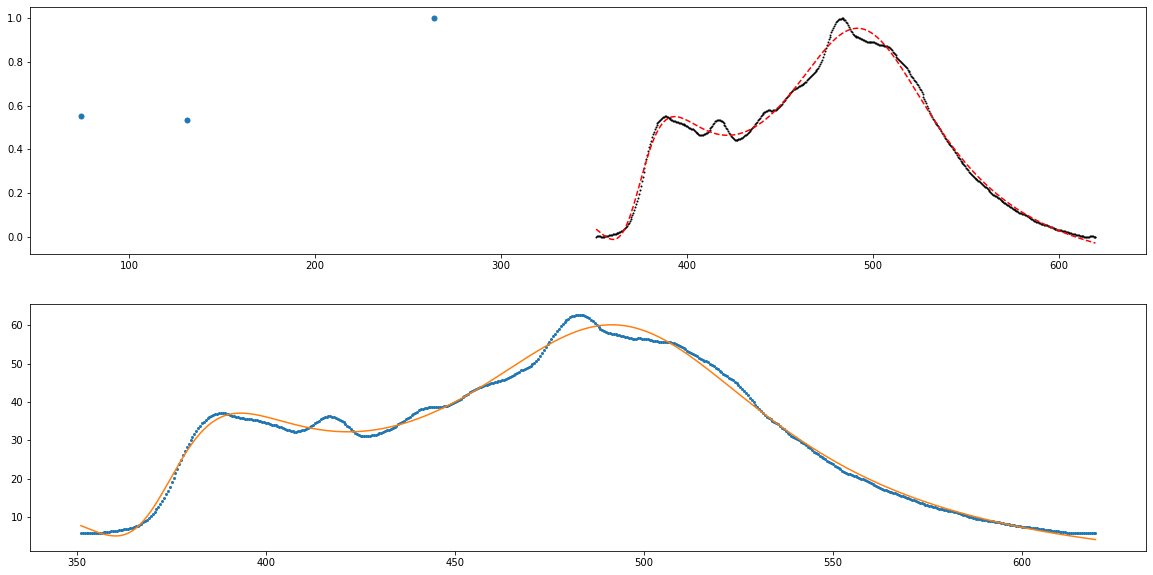

In [28]:
fit(x,y3)

# sample4

In [41]:
    y0 =y4
    yData =y4
    xData =x

    yGround = min( yData ) 
    yData = yData - yGround
    yAmp = max( yData )
    yData = yData / yAmp 

    #initial properties of peaks 
    # height=np.array([16.91907028982027,	8.826463880410214	,14.376432608520542	,2.5407853483704,	6.6865560971685065,	0.7080834495413246,	1.957225920131286,	5.505855192279222	,0.09858016110780439])
    pk, properties = find_peaks( yData, height = 0.09, width = 3 )
    #extract peak heights and fwhm 

    I = properties [ 'peak_heights' ]
    fwhm = properties[ 'widths' ]


    guess = [0]

    for i in range( len( pk ) ): 
        guess.append( pk[i] )
        guess.append( I[i] )
        guess.append( fwhm[i] ) 
        
    guess=np.array( guess )

In [44]:
    popt, pcov = leastsq( res_multi_lorentz , x0=guess, args=( xData, yData ) ,method=trf )
#x0=Initial guess on independent variables 
# print( popt 


    testData = [ multi_lorentz( x, popt ) for x in xData ]
    fitData = [ yGround + yAmp * multi_lorentz( x, popt ) for x in xData ]
    
    #plot

    fig= plt.figure( figsize=( 20, 10 ) )

    ax= fig.add_subplot( 2, 1, 1 )
    ax.plot( pk, yData[pk], 'o', ms=5 )
    ax.plot( xData, yData, 'ok', ms=1 )
    ax.plot( xData, testData , 'r--', lw=1.5 )

    bx= fig.add_subplot( 2, 1, 2 )

    bx.plot( xData, y0, ls='', marker='o', markersize=2 )
    bx.plot( xData, fitData )


    plt.show()

NameError: name 'trf' is not defined

# sample5

c:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 2200.
  warnings.warn(errors[info][0], RuntimeWarning)


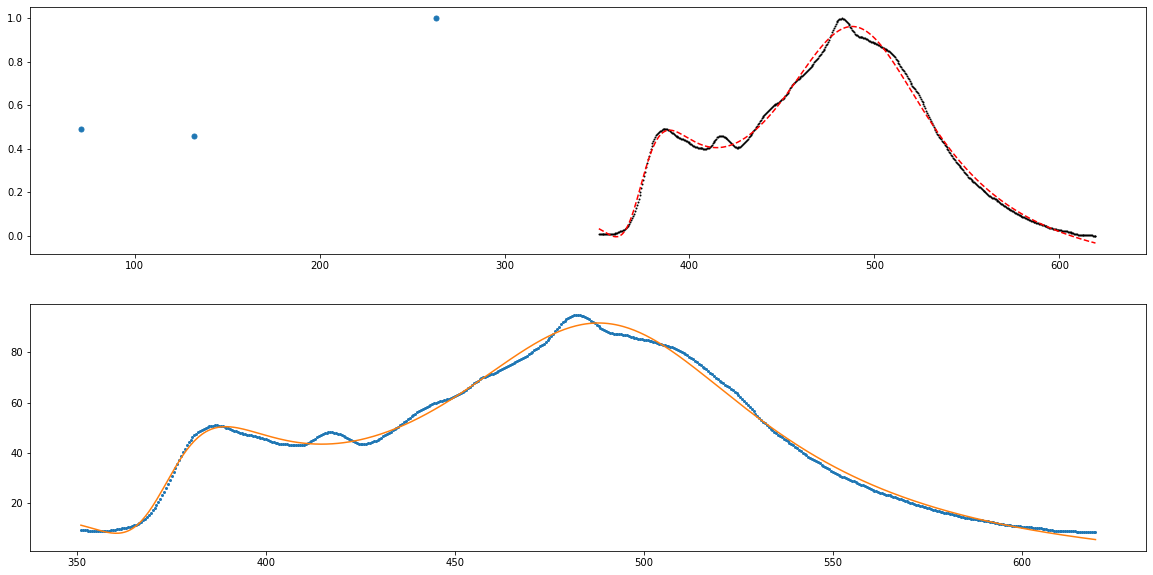

In [30]:
fit(x,y5)

# Uv

In [98]:
uv= pd.read_excel(r'C:\Users\Asus\Desktop\solar_cell\Paper 1\absorption.xlsx' ,sheet_name='Sheet2')

In [99]:
uv.dropna(axis=1, how='all',inplace=True)

In [100]:
uv=uv.copy().rename(columns={'Unnamed: 0': 'wavelength(nm)',
                           })

In [101]:
uv.drop(['Unnamed: 3','Unnamed: 6','Unnamed: 9','Unnamed: 12'], axis=1, inplace=True)